# Home Assignment No. 3: Part 2

In this part of the homework you are to solve several problems related to machine learning algorithms.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

# Clustering

## Task 1 (1 + 2 = 3 pt.): Practice with Different Clustering Algorithms

### Task 1.1 (1 pt.)

Try `KMeans`, `Gaussian Mixture` and **two** more clustering algorithms from `sklearn`. 
To evaluate clustering performance use **two** clustering metrics: `silhouette score`
and `adjusted mutual information`.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;


In [0]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

True number of clusters is 15


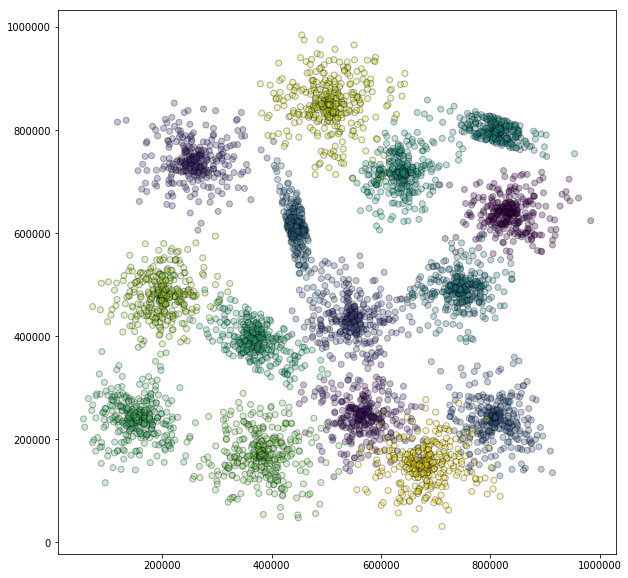

In [0]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')
plt.show()

/home/nexxof/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/nexxof/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/nexxof/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/nexxof/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

<Figure size 432x288 with 0 Axes>

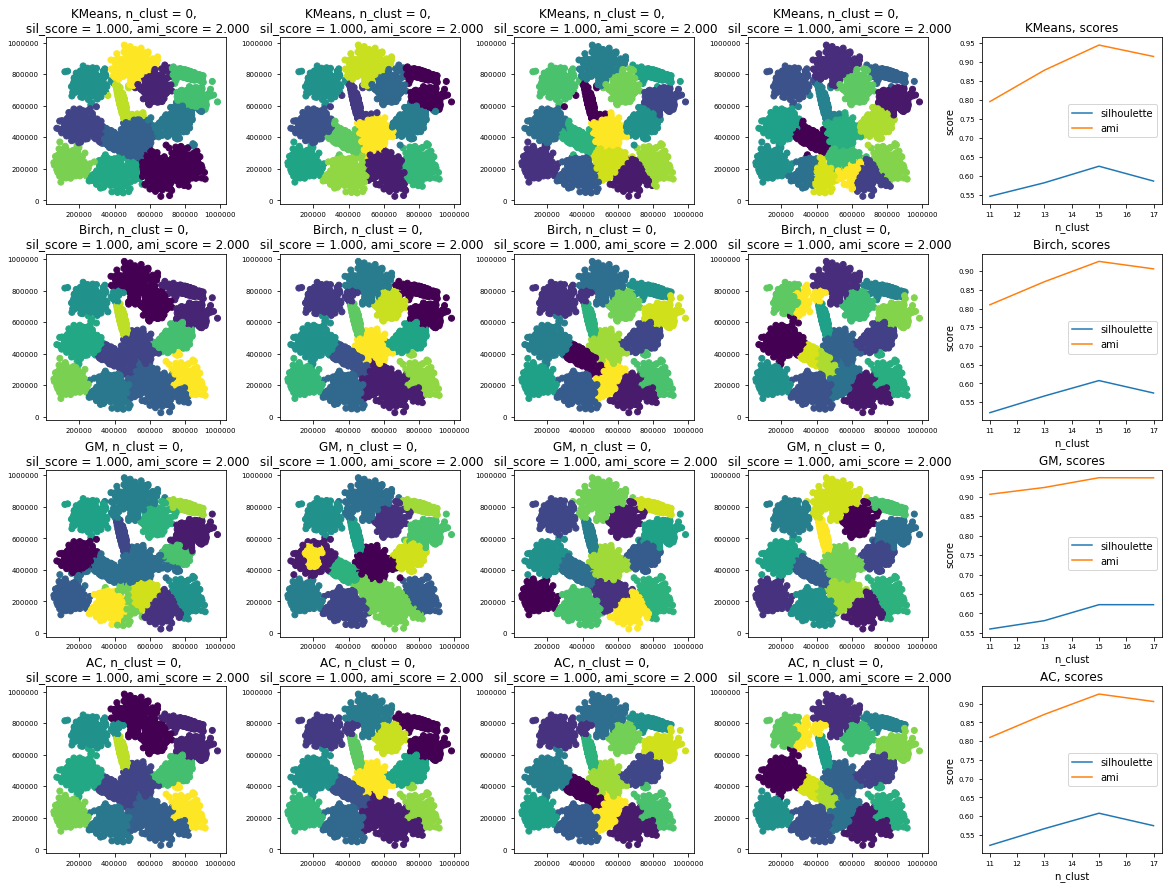

In [0]:
### BEGIN Solution

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer

SMALL_SIZE = 7

plt.tight_layout()
plt.rc('xtick', labelsize=SMALL_SIZE)   
plt.rc('ytick', labelsize=SMALL_SIZE)

X = points
y = labels
n_clust = [11, 13, 15, 17]
models = {
    #Gridsearch Kmeans tol=0.05, max_iter=300
    'KMeans': KMeans(n_clusters=15, tol=0.05, max_iter=300),
    #Gridseach Birch thr=0.1, br_fac=30 
    'Birch': Birch(n_clusters=15, threshold=0.1, branching_factor=30), 
    #Gridseach gm GM tol=0.0001, best_max_iter=50 
    'GM': GaussianMixture(n_components=15, tol=0.0001, max_iter=50),
    #Birch Best_linkage:  ward
    'AC': AgglomerativeClustering(n_clusters=15, linkage='ward') 
}
plt.figure(figsize=(20,15))
plot_count = 1
for name, model in models.items(): 
    j=0
    for k in n_clust:
        model.n_clusters = k
        preds = model.fit_predict(X, y)
        scores_sil[j] = silhouette_score(X, preds)
        scores_ami[j] = adjusted_mutual_info_score(y, preds)
        plt.subplot(4,5,plot_count)
        plt.title(f'{name}, n_clust = {0}, \n sil_score = {1:.3f}, ami_score = {2:.3f}'.format(k, scores_sil[j], scores_ami[j]))
        j+=1
        plt.scatter(X[:,0], X[:,1], c=preds)
        plot_count += 1
    plt.subplot(4,5,plot_count)
    plt.title(f'{name}, scores')
    plt.plot(n_clust, scores_sil,label = 'silhoulette')
    plt.plot(n_clust, scores_ami, label = 'ami')
    plt.xlabel('n_clust')
    plt.ylabel('score')
    plt.legend()
    plot_count+=1

plt.subplots_adjust(wspace=0.3, hspace=0.3)
### END Solution

<br>

### Task 1.2 (2 pt.): Finding the Number of Clusters with Bootstrap

For a chosen algorithm find the best number of clusters using bootstrap.

So, first, based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.

1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence intervals**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and choose the best number of clusters.


The best number of clusters to use is 15, as it has the highest score


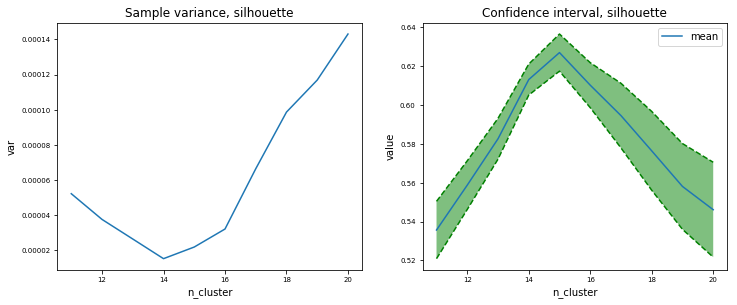

In [0]:
from tqdm import tqdm_notebook

### BEGIN Solution

cluster_ns = np.arange(11, 21)
sample_number = 30
from scipy.stats import t
np.random.seed(1)
n_examples = X.shape[0]
var_final = []
conf_int = []
means = []
var_final_chs = []
conf_int_chs = []
means_chs = []
t_quantiles = t.interval(0.95, sample_number)

for i_cn, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    # >>> your code here <<<
    model = KMeans(n_clusters=n_clusters, tol=best_tol_kmeans, max_iter=best_max_iter_kmeans)
    scores = []
    scores_chs = []
    for sample_index in tqdm_notebook(range(sample_number)):
        # >>> your code here <<<
        inds =  np.random.choice(np.arange(n_examples), size = int(0.8*n_examples))
        preds = model.fit_predict(X[inds])
        scores.append(silhouette_score(X[inds], preds))
    # >>> your code here <<<
    scores = np.asarray(scores)
    means.append(scores.mean())
    var = ((scores - scores.mean())**2).sum()/sample_number
    conf = [scores.mean() + np.sqrt(var)*t_quantiles[0], scores.mean() + np.sqrt(var)*t_quantiles[1]]
    var_final.append([var])
    conf_int.append([conf])
    

# >>> your code here <<<
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('Sample variance, silhouette')
plt.plot(cluster_ns, var_final)
plt.xlabel('n_cluster')
plt.ylabel('var')
plt.subplot(222)
plt.title('Confidence interval, silhouette')
plt.plot(cluster_ns, means, label = 'mean')
plt.plot(cluster_ns, np.asarray(conf_int)[:,0][:,0], linestyle='--', color='green')
plt.plot(cluster_ns, np.asarray(conf_int)[:,0][:,1], linestyle='--', color='green')
plt.fill_between(cluster_ns, np.asarray(conf_int)[:,0][:,0], np.asarray(conf_int)[:,0][:,1], facecolor='green', alpha=0.5)
plt.xlabel('n_cluster')
plt.ylabel('value')
plt.legend()
print('The best number of clusters to use is {}, as it has the highest score'.format(cluster_ns[np.array(means).argmax()]))

### END Solution

<br>

# Dimentionality Reduction and Manifold Learning

## Task 2 (1 + 1 + 2 + 1 = 5 pt.)

Assume that you have $n$ points in $D$ dimensional space:

$$u_1, ..., u_n \in \mathbb R^D.$$

There exist a *linear* data transformation $F(u): \mathbb R^D \rightarrow \mathbb R^d, D >> d$ such that:

$$(1-\delta) \|u_i - u_j\|^2 \leq \|F(u_i) - F(u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$

with high probability.

The transformation $F(u)$ is: $F(u) = \tfrac{1}{\sqrt d}Xu$, and $X \in \mathbb R^{d \times D}$ is a random matrix, components of which are independent identically distributed $X_{ij} \sim \mathcal{N}(0, 1)$.

This statement means that there exists a matrix that reduces the original dimensionality such that pairwise distances are not distorted much. This is a theoretical probabilistic result that *guarantees* you such a transformation. We will obtain a bound on $d$ for which this result holds true.

**Chernoff inequality.** This unequality states a bound on distribution tail.

$$\mathbb P(X \geq t) \leq \frac{\mathbb E \exp(\lambda X)}{\exp(\lambda t)}$$

**Definition.** Random variable $X$ is called subexponential with parameters $(\sigma^2, b)$, if for all $\lambda: |\lambda| < \frac{1}{b}$ the following is true:

$$\mathbb E \exp(\lambda (X - \mathbb E X)) \leq \exp\left(\frac{\lambda^2\sigma^2}{2}\right)$$

**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is a sum of squares of $d$ independent standard gaussian random variables.


**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is subexponential with parameters $\sigma^2 = 4d, b = 4$

<br>

### Task 2.1 (1 pt.):

Using the above information, prove that for $Y \sim \chi^2$ with $d$ degrees of freedom the following inequality holds true:

$$\mathbb P (\lvert Y - d \rvert \geq t) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

for $t \leq \frac{\sigma^2}{b}$. 

**Hint**: you will need to optimise the power of exponential in order to get optimal $\lambda$.

**BEGIN Solution**

$\mathbb{P}[X \geq t] \leq \frac{\mathbb{E}[X]}{t},~\forall t > 0$

$\mathbb{P}[|X - \mathbb{E}[X]| \geq t] \leq \frac{\mathbb{E}[|X - \mathbb{E}[X]|^k]}{t^k},~\forall t > 0$

Assume that: $\exists~\phi(\lambda) = \mathbb{E}\left[e^{\lambda(X - \mathbb{E}X)}\right] \Rightarrow \exists b > 0:~\forall \lambda \in [0, b] \rightarrow \mathbb{P}[X - \mathbb{E}X \geq t] = \mathbb{P}\left[e^{\lambda(X - \mathbb{E}X)} \geq e^{\lambda t}\right] \leq \frac{\mathbb{E}\left[e^{\lambda(X - \mathbb{E}X)}\right]}{e^{\lambda t}}$

So

$\log\mathbb{P}\left[X - \mathbb{E}X \geq t\right] \leq \sup_{\lambda \in [0, b]}\left[\lambda t - \log\mathbb{E}\left[e^{\lambda(X - \mathbb{E}X)}\right]\right]$

From $\mathbb{P}[X - \mathbb{E}X \geq t] \leq \frac{\mathbb{E}\left[e^{\lambda(X - \mathbb{E}X)}\right]}{e^{\lambda t}} \Rightarrow $

\begin{align}
\mathbb{P}[X - \mathbb{E}X \geq t] &\leq \frac{\mathbb{E}\left[e^{\lambda(X - \mathbb{E}X)}\right]}{e^{\lambda t}} = e^{-\lambda t}\mathbb{E}[e^{\lambda(X - \mathbb{E}X)}] \leq e^{-\lambda t + \frac{\lambda^2 \sigma^2}{2}},~\lambda \in [0, 1/b),~t \geq 0
\end{align}

$$f(\lambda) = e^{-\lambda t + \frac{\lambda^2 \sigma^2}{2}} \to \min_{\lambda \in [0, 1/b)}$$

$$e^{-\lambda t + \frac{\lambda^2 \sigma^2}{2}}(-t + \lambda \sigma^2) = 0$$

For $t \in [0, \sigma^2/b) \Rightarrow \lambda = \frac{t}{\sigma^2},~f(\lambda) = e^{-\frac{t^2}{2\sigma^2}}$

Then for $t \geq \sigma^2/b$ the function is decreasing and hence the minimum $\lambda = \frac{1}{b}$ and $\log f(\lambda) = -\frac{t}{b} + \frac{\sigma^2}{2b^2} \leq -\frac{t}{b} + \frac{t}{2b} = -\frac{t}{2b}$

\begin{equation}
\mathbb{P}[X - \mathbb{E}X \geq t] \leq
\begin{cases}
e^{-\frac{t^2}{2\sigma^2}},~t \in [0, \sigma^2/b)\\
e^{-\frac{t}{2b}},~t \geq \sigma^2/b
\end{cases}
\end{equation}

The same holds for $-(X - \mathbb{E}X) \geq t$, so

\begin{equation}
\mathbb{P}\left[|X - \mathbb{E}X| \geq t\right] = \mathbb{P}\left[X - \mathbb{E}X \geq t \right] + \mathbb{P}\left[-X + \mathbb{E}X \geq t \right] \leq 2
\begin{cases}
e^{-\frac{t^2}{2\sigma^2}},~t \in [0, \sigma^2/b)\\
e^{-\frac{t}{2b}},~t \geq \sigma^2/b
\end{cases}
\end{equation}


and the fact that $X \sim \chi^2(d)$ is sub-exponential:

If $Y \sim {\cal N}(0, 1)$ it holds:

\begin{align}
\mathbb{E}\left[e^{\lambda(Y^2 - 1)}\right]
&= \frac{1}{\sqrt{2 \pi}}\int\limits_{-\infty}^{\infty}\exp\left(\lambda(y^2 - 1) - \frac{y^2}{2}\right)dy\\
&= \frac{e^{-\lambda}}{\sqrt{2 \pi}}\int\limits_{-\infty}^{\infty}
\exp\left(\lambda y^2 - \frac{y^2}{2}\right)dy\\
&= \frac{e^{-\lambda}}{\sqrt{2 \pi}}\int\limits_{-\infty}^{\infty}
\exp\left(- \frac{y^2}{2}(1 - 2\lambda) \right)dy,~\lambda \in [0, 1/2)\\
&= \frac{e^{-\lambda}}{\sqrt{2 \pi}\sqrt{1 - 2\lambda}}\int\limits_{-\infty}^{\infty}e^{-x^2/2}dx = \frac{e^{-\lambda}}{\sqrt{1 - 2\lambda}}\\
&\leq e^{2\lambda^2},~\lambda \in [0, 1/4)
\end{align}

$$X = \sum\limits_{i = 1}^dY_i^2,~Y_i~iid~{\cal N}(0, 1)$$

Then ($\mathbb{E}X = d$)

\begin{align}
\mathbb{E}\left[e^{\lambda(X - d)}\right] = \prod\limits_{i = 1}^d\mathbb{E}\left[e^{\lambda(Y_i^2 - 1)}\right] \leq e^{2d\lambda^2},~\lambda \in [0, 1/4)
\end{align}

So, we obtain: $(b, \sigma) = (4, 2\sqrt{d})$

And 

\begin{equation}
\mathbb{P}\left[|X - d| \geq t\right] \leq 2e^{-\frac{t^2}{8d}},~ t \in [0, \sigma^2/b)
\end{equation}

**END Solution**

<br>

### Task 2.2 (1 pt.):

Prove that $\frac{\|Xu\|^2}{\|u\|^2}$ is $\chi_2$ random variable with $d$ degrees of freedom.

**BEGIN Solution**


$Xu = 
\begin{bmatrix}
(X_1, u)\\
(X_2, u)\\
\vdots\\
(X_d, u)
\end{bmatrix}
$, $X_i$ - rows of matrix, since $X_{ij} \sim {\cal N} (0, 1) \Rightarrow X_i \sim {\cal N}(0, I_D)$ as $X_{ij}$ iid $\Rightarrow (X_i, u)/\|u\|$ normally distributed with:
$\mathbb{E}(X_i, u)/\|u\| = (\mathbb{E}X_i, u)/\|u\| = 0$ and ${\rm Var}(X_i, u)/\|u\| = \frac{1}{\|u\|^2}\mathbb{E}(X_i, u)^2 = \frac{1}{\|u\|^2}\mathbb{E}u^{\top}X_i^{\top}X_iu = \frac{u^{\top}{\rm Var}(X_i)u}{\|u\|^2} = \frac{u^{\top}u}{\|u\|^2} = 1$


So, $(X_i, u)/\|u\| \sim {\cal N}(0, 1)$.

\begin{align}
\frac{\|Xu\|^2}{\|u\|^2} = \sum\limits_{i = 1}^d(X_i, u/\|u\|)^2 \sim \sum\limits_{i = 1}^d{\cal N}(0, 1) \overset{iid}{\sim} \chi^2(d)
\end{align}

**END Solution**

<br>

### Task 2.3 (2 pt.)

Having all of the previous results, we now may apply them to get the bound.

From inequality for tails from Task 4.1 we get that:

$$\mathbb P \left(\left\lvert \frac{\|Xu\|^2}{\|u\|^2} - d \right\rvert \geq t\right) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

This means that probability of such event that our distances will change a lot is bounded.

1. Show that if probability above is small, then probability of: $$(1-\delta) \|u_i - u_j\|^2 \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$ is big and basically almost equal to $1 - n(n-1)\exp \left(-\frac{\delta^2d}{8}\right)$.

2. After the previous step, we got that if we want to have our inequalities to be true with high probability $1-\varepsilon$, we want to bound it from above. Derive the inequality for $d$ from that.

**Hint:**
* at some point you would like to take $\delta = \frac{t}{d}$. Note that it makes $\delta$ be in range of 0 and 1

**BEGIN Solution**


$\mathbb{P}\left(\left|\frac{\|Xu\|^2}{\|u\|^2} - d\right| \geq t\right)
= \mathbb{P}\left(\frac{\|Xu\|^2}{\|u\|^2} \notin [d - t, d + t]\right) = \mathbb{P}\left(\frac{\|Xu\|^2}{\|\sqrt{d}u\|^2} \notin [1 - \delta, 1 + \delta]\right)$, where $\delta = \frac{t}{d}$

$\mathbb{P}\left(\frac{\|Xu\|^2}{\|\sqrt{d}u\|^2} \notin [1 - \delta, 1 + \delta]\right) \leq 2\exp\left(-\frac{d\delta^2}{8}\right)\Rightarrow \mathbb{P}\left(\frac{\|X(u_i - u_j)\|^2}{\|\sqrt{d}(u_i - u_j)\|^2} \notin [1 - \delta, 1 + \delta]\right) \leq 2\exp\left(-\frac{d\delta^2}{8}\right)$

So, for all pairs we obtain $\sum\limits_{u_i, u_j \in {\cal D}}\mathbb{P}\left(\frac{\|X(u_i - u_j)\|^2}{\|\sqrt{d}(u_i - u_j)\|^2} \notin [1 - \delta, 1 + \delta]\right) \leq 2C_{n}^2\exp\left(-\frac{d\delta^2}{8}\right)$

Then

\begin{align}
\sum\limits_{u_i, u_j \in {\cal D}}\mathbb{P}\left(\frac{\|X(u_i - u_j)\|^2}{\|\sqrt{d}(u_i - u_j)\|^2} \in [1 - \delta, 1 + \delta]\right) = 1 - \sum\limits_{u_i, u_j \in {\cal D}}\mathbb{P}\left(\frac{\|X(u_i - u_j)\|^2}{\|\sqrt{d}(u_i - u_j)\|^2} \notin [1 - \delta, 1 + \delta]\right) > 1 - n(n - 1)\exp\left(-\frac{d\delta^2}{8}\right)
\end{align}

The assumption that  $1 - n(n - 1)\exp\left(-\frac{d\delta^2}{8}\right)$ is hight true if $n(n - 1)\exp\left(-\frac{d\delta^2}{8}\right) \leq \varepsilon$, $\varepsilon \in (0, 1)$  is small. 

So, $\exp\left(\frac{d\delta^2}{8}\right) \geq \frac{n(n - 1)}{\varepsilon} \Rightarrow \frac{d\delta^2}{8} \geq \log\frac{n(n - 1)}{\varepsilon} \Rightarrow d \geq \frac{8}{\delta^2}\log\frac{n(n - 1)}{\varepsilon}$

**END Solution**

<br>

### Task 2.4 (1 pt.)

We have sucessfully got our lower bound on the dimensionality we can safely reduce to such that pairwise distances do not change much: 

$$d \geq \frac{8}{\delta^2}\log\left(\frac{n(n-1)}{\varepsilon}\right)$$

Note the beauty of that inequality. It **doesn't depend** on original dimensionality $D$, parameters $n$ -- number of samples and $\varepsilon$ -- probability are under the $\log$ function.

This bound is not very tight, using more advanced techniques you may improve it. That means, our estimate of $d$ may be too high, but we can guarantee our result for it. Also remember that this approach is probabilistic, and, basically, depends on how lucky you will be with your data. It is very useful in case of extremely large dimensionalities $D$, and allows to reduce dimensionality while preserving the structure of data.

Now implement the obtained result and confirm that it holds true:

1. Fetch *20news* dataset
2. Check the dimensionality of data
3. Generate a random matrix of the corresponding size. **Note** that this might take a while (or you may run out of memory).
4. Fix $\delta$ = 0.15 and $\varepsilon$ = 0.01
5. Show that distances of transformed data are within the delta tube. Write down 1-2 sentences to point out the ratio. Remember that our result is not applicable in case if distance is 0
6. Show that for smaller $d$ this result doesn't work. You will have to take much smaller $d$ in order to show that (ten times less, for example). Write down 1-2 sentences, describing the result .

In [0]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.metrics.pairwise import euclidean_distances
from numpy.random import standard_normal

X = fetch_20newsgroups_vectorized().data[:5000] #even colaboratory is failing to calculate full

In [2]:
### BEGIN Solution
import numpy as np
print ('First case:\n')
delta = 0.15
epsilon = 0.01
d = int(np.ceil(8/delta**2*np.log(X.shape[0]*(X.shape[0]-1)/epsilon)))
print(d)
dist_matrix = euclidean_distances(X).astype(np.float16)**2
print ('dist_matrix succesfully calculated')
dist_matrix_2 = euclidean_distances((np.random.randn(d, X.shape[1]).astype(np.float16)@X.T).astype(np.float16).T)**2/d
print ('dist_matrix_2 succesfully calculated')
n = np.tril(((1+delta)*dist_matrix - dist_matrix_2>0).__and__((1-delta)*dist_matrix - dist_matrix_2  < 0).__or__(dist_matrix == 0), -1).sum()
print('Pairs inside tube: {} of {}'.format(n, int((dist_matrix.shape[0]-1)*dist_matrix.shape[0]/2)))

First case:

7694
dist_matrix succesfully calculated
dist_matrix_2 succesfully calculated
Pairs inside tube: 12497500 of 12497500


In [4]:
print ('Second case (d 10 times smaller):\n')

delta = 0.15
epsilon = 0.01
d = int(np.ceil(8/delta**2*np.log(X.shape[0]*(X.shape[0]-1)/epsilon))/10)
print(d)
dist_matrix = euclidean_distances(X).astype(np.float16)**2
print ('dist_matrix succesfully calculated')
dist_matrix_2 = euclidean_distances((np.random.randn(d, X.shape[1]).astype(np.float16)@X.T).astype(np.float16).T)**2/d
print ('dist_matrix_2 succesfully calculated')
n = np.tril(((1+delta)*dist_matrix - dist_matrix_2>0).__and__((1-delta)*dist_matrix - dist_matrix_2  < 0).__or__(dist_matrix == 0), -1).sum()
print('Pairs inside tube: {} of {}'.format(n, int((dist_matrix.shape[0]-1)*dist_matrix.shape[0]/2)))
### END Solution

Second case (d 10 times smaller):

769
dist_matrix succesfully calculated
dist_matrix_2 succesfully calculated
Pairs inside tube: 12453768 of 12497500


Now we could see that not everything lies in the delta tube.

<br>

## Task 3 (2 + 3 = 6 pt.). MNIST principal component analysis 

### Task 3.1 (2 pt.)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset into principal components and estimate the cumulative explained variance by each component.

You can either use the method proposed here https://www.stat.berkeley.edu/~bickel/mldim.pdf for the sample intrinsic dimension estimation, or any other method known to you. For the first case, you can use implemented code from here https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4 

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data into principal components (PCA). Plot the cumulative explained variance by each component.
3. Plot the example of reconstructed image with **6** different sets of components and prove the corresponding explained variance. You can choose any digit from the dataset.

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

data = StandardScaler().fit_transform(digits.data)

### BEGIN Solution
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    intdim_var = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k)
        intdim_k.append(m.mean())
        intdim_var.append(m.std())
    return intdim_k, intdim_var

intdim_k, intdim_var = intrinsic_dim_scale_interval(data, 2, 60)
### END Solution

/home/nexxof/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


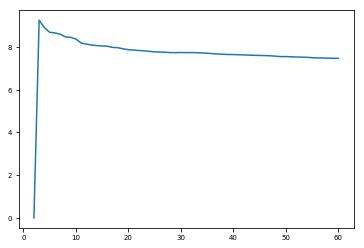

In [0]:
# >>> your code here <<<
plt.plot(np.arange(2, 61), intdim_k, label = 'mean')

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

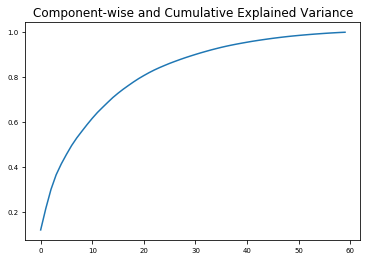

In [0]:
# >>> your code here <<<


from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X_r = pca.fit(data).transform(data)

plt.plot(range(60), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

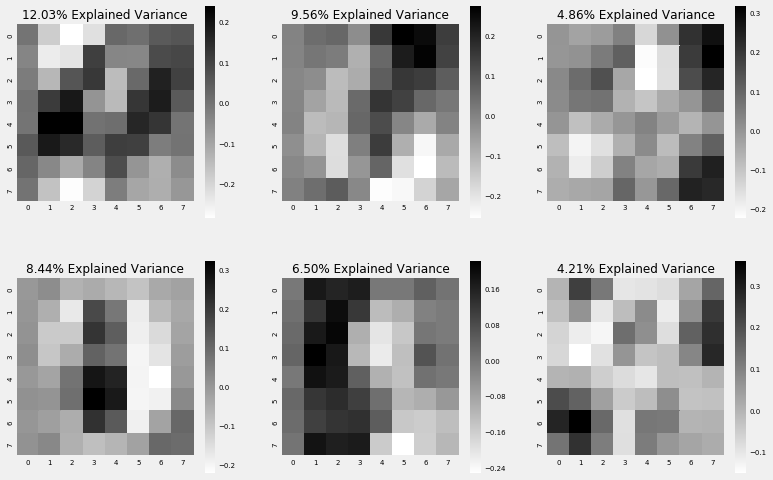

In [0]:
pca = PCA(n_components=60)
X_r = pca.fit(data).transform(data)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(2, 3, figsize=(12, 8))

sns.heatmap(pca.components_[0, :].reshape(8, 8), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(8, 8), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(8, 8), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(8, 8), ax=axarr[1][1], cmap='gray_r')
sns.heatmap(pca.components_[4, :].reshape(8, 8), ax=axarr[0][2], cmap='gray_r')
sns.heatmap(pca.components_[5, :].reshape(8, 8), ax=axarr[1][2], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[4]*100),
    fontsize=12
)
axarr[1][2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[5]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')
axarr[0][2].set_aspect('equal')
axarr[1][2].set_aspect('equal')


<br>

### Task 3.2 (3 pt.)

Here we will visualize the decomposition, to observe how the data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracies on the new features. 

1. **(1 pt.)** Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Be sure that the data is whitened (scaled). 
2. **(1 pt.)** Calculate new features of the data with ICA, PCA, and Isomap. **Choose the number of components according to your estimation of intrinsic dimention, see Task 3.1**. Calculate the classification accuracy on these features with `LogisticRegression` on cv=5, 3 repeats. Use `RepeatedKFold` and fix the `random_seed=0`.
3. **(1 pt.)** Show that `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test (for example `scipy.stats.ttest_ind`). Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.

In [0]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl
import pandas as pd
import sklearn.manifold 

init_notebook_mode(connected=True)

iso = Isomap(n_neighbors=5, n_components=3, eigen_solver='dense')

### BEGIN Solution

### END Solution

In [0]:
# >>> your code here <<<

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

In [0]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

scores=list()

### BEGIN Solution

print(temp)
### END Solution

,dim.reduction method,mean accuracy,std
1,PCA,0.932482,0.00954449
2,ICA,0.85773,0.0212201
3,Isomap,0.974777,0.00965627


In [0]:
# >>> your code here <<<

Statistically significant improvement of PCA decomposition over ICA: p-value  2.085472799316657e-17


In [0]:
# >>> your code here <<<

Statistically significant improvement of Isomap decomposition over PCA: p-value  2.9498487304148144e-12


<br>

### Task 3.3* (4 pt.). Bonus.

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist (Kuzushiji-MNIST (10 classes, 28x28, 70k examples)). You are to engineer new features with any convenient method of Manifold Learning to increase the classification accuracy. Use the $k$NN classifier and validation code from here https://github.com/rois-codh/kmnist/blob/master/benchmarks/kuzushiji_mnist_knn.py. Your accuracy on the test should be more than `91.56%`.

**NOTE** that the data is rather heavy, thus your decomposition will take a while.